# Ejercicios de clase

(los ejercicios de la tarea están más abajo)

In [99]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

cancer = load_breast_cancer(as_frame=True)
df = cancer.frame
X = df[cancer['feature_names']]

In [100]:
X_mean = X.mean()
X_std = X.std()
Z = (X - X_mean) / X_std

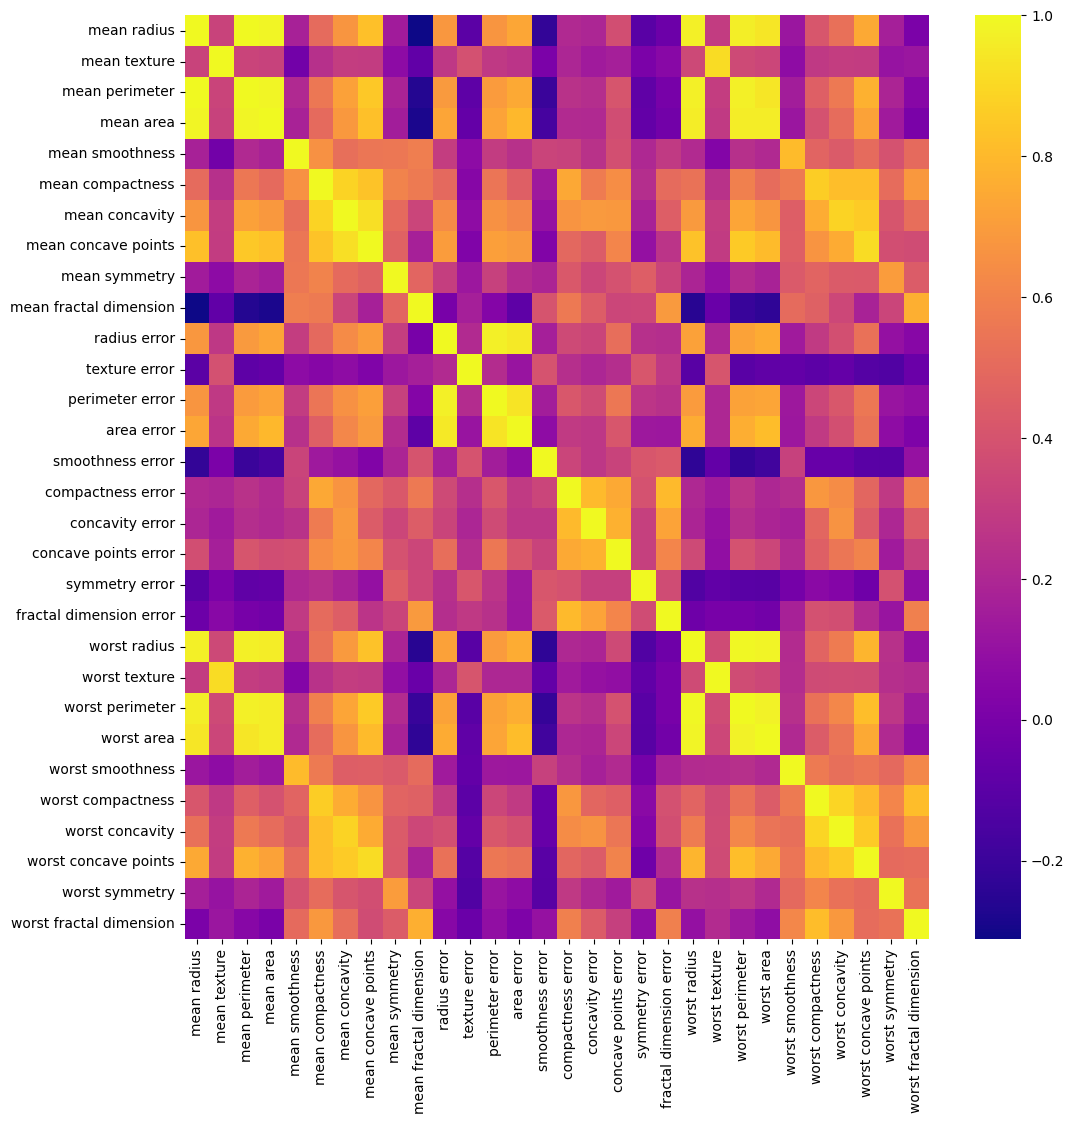

In [101]:
c = Z.cov()
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 12))
sns.heatmap(c, cmap='plasma')
plt.show()

In [102]:
import sys

eigenvalues, eigenvectors = np.linalg.eig(c)
sys.stdout.write('Valores propios:\n')
sys.stdout.write(str(eigenvalues) + '\n')
sys.stdout.write('Forma de los valores propios: ' + str(eigenvalues.shape) + '\n')
sys.stdout.write('Forma de los vectores propios: ' + str(eigenvectors.shape) + '\n')

Valores propios:
[1.32816077e+01 5.69135461e+00 2.81794898e+00 1.98064047e+00
 1.64873055e+00 1.20735661e+00 6.75220114e-01 4.76617140e-01
 4.16894812e-01 3.50693457e-01 2.93915696e-01 2.61161370e-01
 2.41357496e-01 1.57009724e-01 9.41349650e-02 7.98628010e-02
 5.93990378e-02 5.26187835e-02 4.94775918e-02 1.33044823e-04
 7.48803097e-04 1.58933787e-03 6.90046388e-03 8.17763986e-03
 1.54812714e-02 1.80550070e-02 2.43408378e-02 2.74394025e-02
 3.11594025e-02 2.99728939e-02]
Forma de los valores propios: (30,)
Forma de los vectores propios: (30, 30)


40

In [103]:
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:, idx]

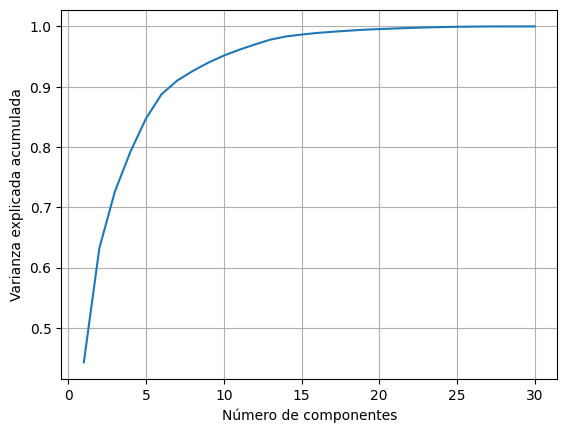

In [104]:
explained_var = np.cumsum(eigenvalues) / np.sum(eigenvalues)
plt.plot(range(1, len(explained_var) + 1), explained_var)
plt.xlabel("Número de componentes")
plt.ylabel("Varianza explicada acumulada")
plt.grid()
plt.show()

In [105]:
n_components = np.argmax(explained_var >= 0.50) + 1

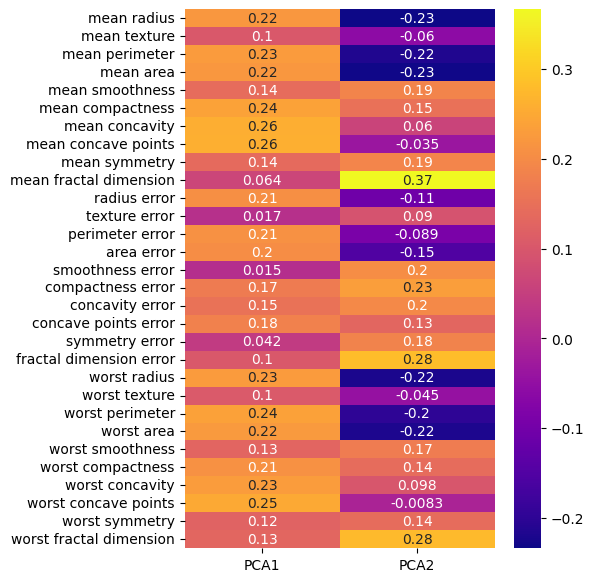

In [106]:
eigenvectors_subset = eigenvectors[:, :n_components]
pca_component = pd.DataFrame(eigenvectors_subset,

index = cancer['feature_names'],
columns = [f'PCA{i+1}' for i in range(n_components)])

plt.figure(figsize =(5, 7))
sns.heatmap(pca_component, annot=True, cmap='plasma')
plt.show()

In [107]:
Z_pca = Z @ pca_component
Z_pca.columns = [f'PCA{i+1}' for i in range(n_components)]
Z_pca

,PCA1,PCA2
0,9.184755,1.946870
1,2.385703,-3.764859
2,5.728855,-1.074229
3,7.116691,10.266556
4,3.931842,-1.946359
...,...,...
564,6.433655,-3.573673
565,3.790048,-3.580897
566,1.255075,-1.900624
567,10.365673,1.670540


In [108]:
Z_pca[['PCA1', 'PCA2']].corr() #son ortogonales pq casi tenemos la matriz identidad

,PCA1,PCA2
PCA1,1.000000e+00,1.670838e-16
PCA2,1.670838e-16,1.000000e+00


In [109]:
Z_pca['target'] = df['target'].map({0: 'Maligno (0)', 1: 'Benigno (1)'})

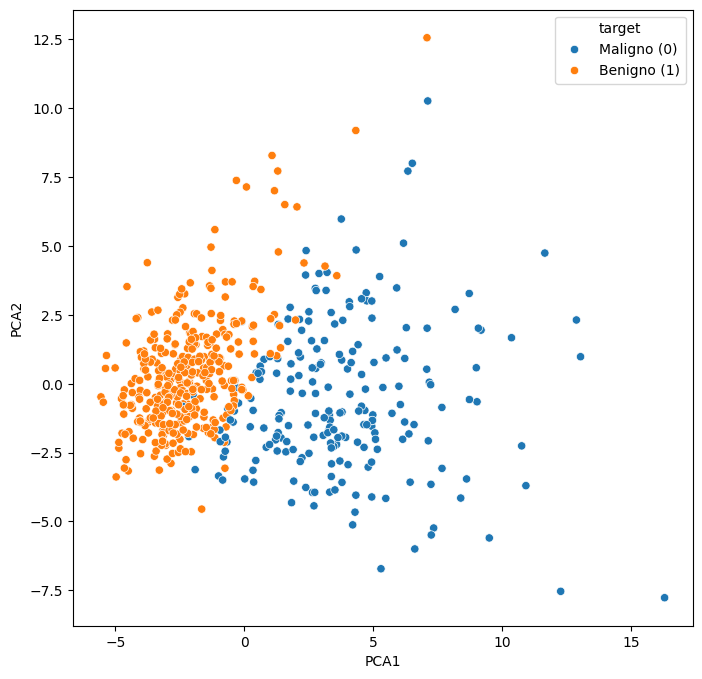

In [110]:
plt.figure(figsize=(8,8))
sns.scatterplot(data=Z_pca, x="PCA1", y="PCA2", hue="target")
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.show()

Hacemos algo similar para el conjunto iris

In [111]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [112]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [113]:
X_mean_iris = X.mean()
X_std_iris = X.std()
Z_iris = (X - X_mean_iris) / X_std_iris

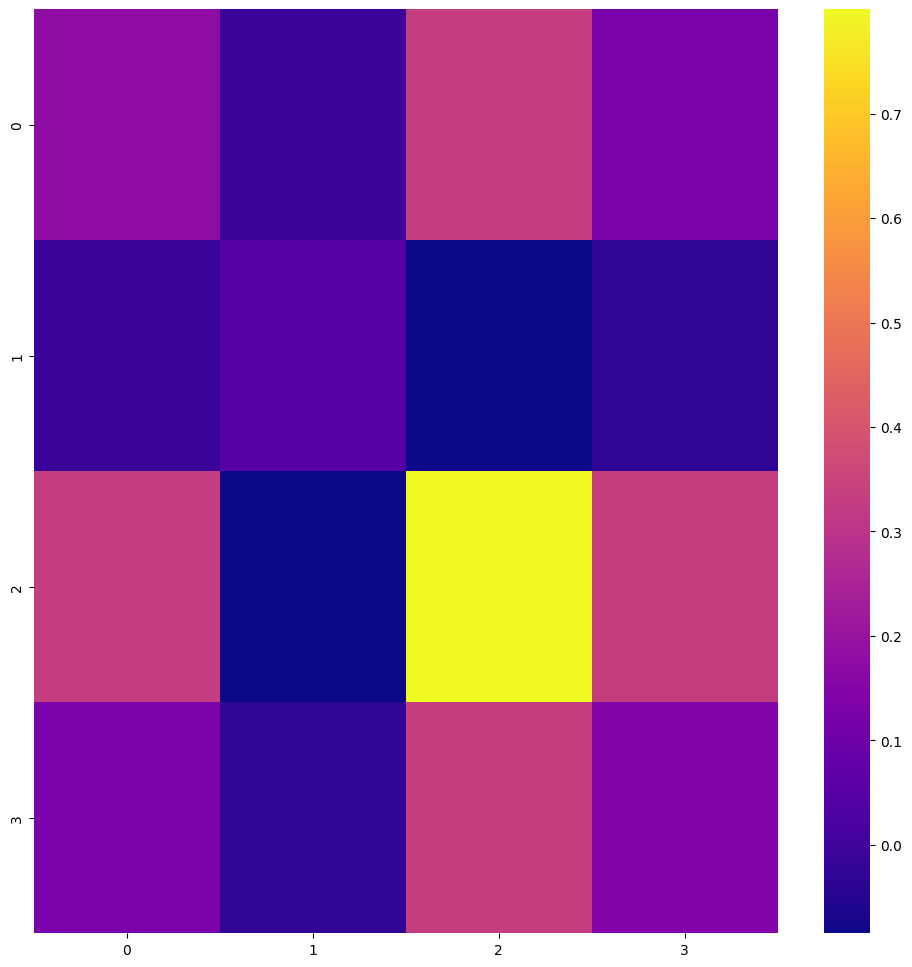

In [114]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
c_iris = np.cov(Z_iris.T)

plt.figure(figsize=(12, 12))
sns.heatmap(c_iris, cmap='plasma')
plt.show()


In [115]:
import sys

eigenvalues_iris, eigenvectors_iris = np.linalg.eig(c_iris)
sys.stdout.write('Valores propios:\n')
sys.stdout.write(str(eigenvalues_iris) + '\n')
sys.stdout.write('Forma de los valores propios: ' + str(eigenvalues_iris.shape) + '\n')
sys.stdout.write('Forma de los vectores propios: ' + str(eigenvectors_iris.shape) + '\n')

Valores propios:
[1.08526193 0.06228625 0.02007402 0.00611775]
Forma de los valores propios: (4,)
Forma de los vectores propios: (4, 4)


38

In [116]:
idx = eigenvalues_iris.argsort()[::-1]
eigenvalues_i = eigenvalues_iris[idx]
eigenvectors_i = eigenvectors_iris[:, idx]

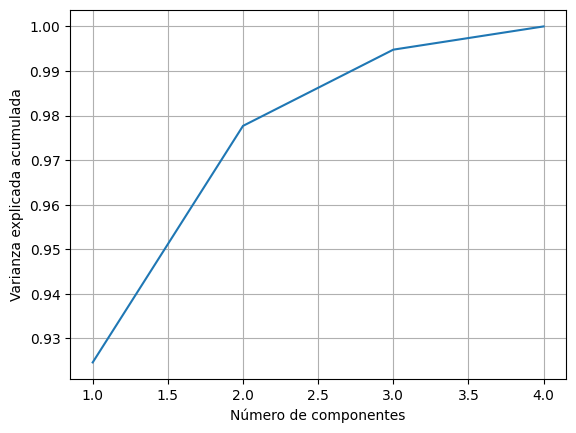

In [117]:
explained_var_iris = np.cumsum(eigenvalues_i) / np.sum(eigenvalues_i)
plt.plot(range(1, len(explained_var_iris) + 1), explained_var_iris)
plt.xlabel("Número de componentes")
plt.ylabel("Varianza explicada acumulada")
plt.grid()
plt.show()

In [118]:
n_comp_iris = np.argmax(explained_var_iris >= 0.95) + 1
n_comp_iris

np.int64(2)

Vemos que para este caso solo necesitamos 2 componentes para retener el 95% de la varianza

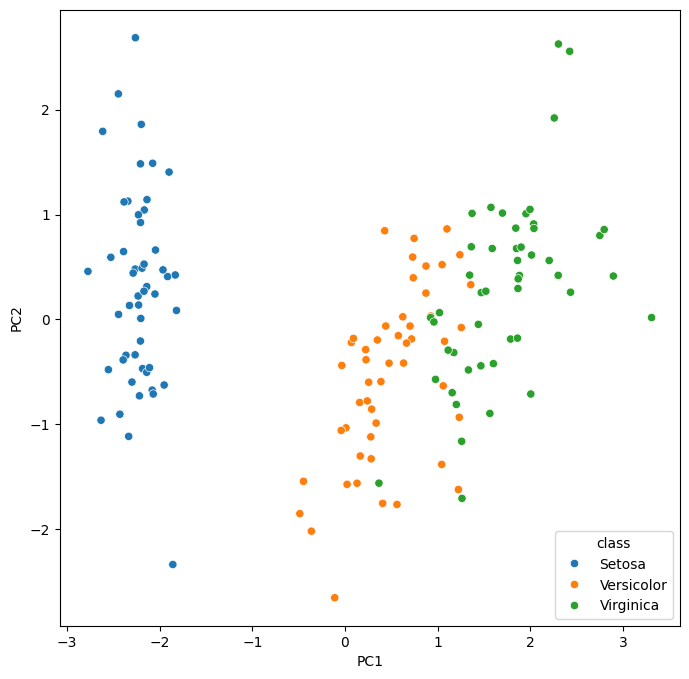

In [119]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

df = pd.DataFrame(X_pca, columns=["PCA1" ,"PCA2"])
df["target"]=y
df["class"]=df["target"].map({0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'})

plt.figure(figsize=(8,8))
sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="class")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

Vemos que claramente la setosa se distingue de las otras, pero un modelo predictivo, con este PCA podría aún confundir una versicolor con una virginica.

In [120]:
#para los ejercicios 7 y 8 de la tarea usamos el código q esta en el classroom graficar_digit

# Tarea 5

aquí arriba está el análisis del conjunto iris

Primero abrimos el archivo mnist

In [123]:
import sys
import pandas as pd

mnist=pd.DataFrame(pd.read_csv('/content/mnist_version_corta.csv'))

variables_estandarizadas=[]

for variable in mnist.columns: #estandarizamos cada variable
  media=mnist[variable].mean()
  desviacion_estandar=mnist[variable].std()
  #aquí es importante mencionar que la mayoría de pixeles son blancos casi siempre, así que a la hora de sacar
  #desviación estándar, esta es cero y dividimos entre cero, lo que resulta en un NaN.

  #para arreglarlo, metemos este if
  if desviacion_estandar != 0:
    var_std=(mnist[variable]-media)/desviacion_estandar
  else:
    var_std = pd.Series(0, index=mnist.index)
  variables_estandarizadas.append(var_std)

#convertimos a dataframe
Z_mnist = pd.concat(variables_estandarizadas, axis=1)

#calculamos la matriz de covariancia
covariance_matrix = Z_mnist.cov()
sys.stdout.write('Matriz de Covarianza:\n')
display(covariance_matrix)

Matriz de Covarianza:


,7,0,1,2,3,4,5,6,7,8,...,0.658,0.659,0.660,0.661,110,111,112,113,114,115
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.033686,0.027751,0.021905,0.015738,0.0,0.0,0.0,0.0,0.0,0.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [127]:
#ahora calculamos eigenvectores y eigenvalores de la matriz D:

eigenvalores, eigenvectores = np.linalg.eig(covariance_matrix)
sys.stdout.write('Valores propios:\n')
sys.stdout.write(str(eigenvalores))
sys.stdout.write('\n')
sys.stdout.write('Forma de los valores propios: ' + str(eigenvalores.shape) + '\n')
sys.stdout.write('Forma de los vectores propios: ' + str(eigenvectores.shape) + '\n')

#por alguna razón estaba teniendo problemas al imprimir ??? y tuve que llamar al sistema, como si estuviera
#escribiendo en java

Valores propios:
[ 4.14758600e+01+0.00000000e+00j  2.85110927e+01+0.00000000e+00j
  2.70410049e+01+0.00000000e+00j  2.15848989e+01+0.00000000e+00j
  1.85411486e+01+0.00000000e+00j  1.61140067e+01+0.00000000e+00j
  1.36764062e+01+0.00000000e+00j  1.25756873e+01+0.00000000e+00j
  1.11723308e+01+0.00000000e+00j  1.01376929e+01+0.00000000e+00j
  9.83512114e+00+0.00000000e+00j  8.76510161e+00+0.00000000e+00j
  8.38901996e+00+0.00000000e+00j  7.98073158e+00+0.00000000e+00j
  7.64988727e+00+0.00000000e+00j  7.31552467e+00+0.00000000e+00j
  6.90046983e+00+0.00000000e+00j  6.64190899e+00+0.00000000e+00j
  6.32732921e+00+0.00000000e+00j  6.08893496e+00+0.00000000e+00j
  5.94141779e+00+0.00000000e+00j  5.79273984e+00+0.00000000e+00j
  5.66499184e+00+0.00000000e+00j  5.51568062e+00+0.00000000e+00j
  5.25440804e+00+0.00000000e+00j  5.15734066e+00+0.00000000e+00j
  5.05641987e+00+0.00000000e+00j  4.90104591e+00+0.00000000e+00j
  4.73573708e+00+0.00000000e+00j  4.56570024e+00+0.00000000e+00j
  4.4670

42

/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/usr/local/lib/python3.12/dist-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


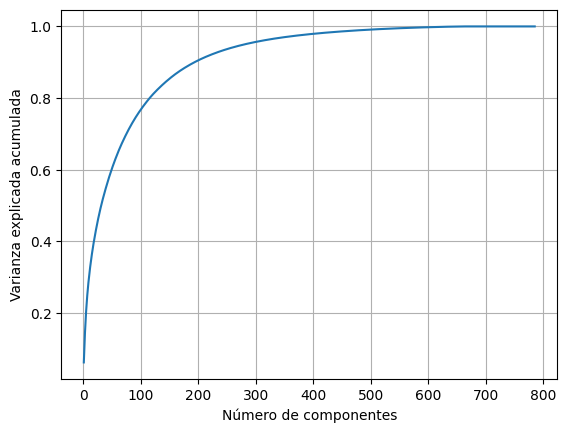

In [128]:
#buscamos el número de componentes que expliquen el 95% de la varianza

idx = eigenvalores.argsort()[::-1]
eigenvalores = eigenvalores[idx]
eigenvectores = eigenvectores[:, idx]
explained_var = np.cumsum(eigenvalores) / np.sum(eigenvalores)
plt.plot(range(1, len(explained_var) + 1), explained_var)
plt.xlabel("Número de componentes")
plt.ylabel("Varianza explicada acumulada")
plt.grid()
plt.show()

In [129]:
n_componentes = np.argmax(explained_var >= 0.95) + 1
n_componentes

np.int64(281)

vemos que para tener el 95% de los datos, necesitamos solo 281 componentes

In [130]:
from sklearn.decomposition import PCA

pca = PCA(n_components=281)
Z_mnist.columns = Z_mnist.columns.astype(str)

pca.fit(Z_mnist)

# obtenemos las componentes principales
X_pca_mnist = pca.transform(Z_mnist)

In [131]:
sys.stdout.write("Original:\n")
sys.stdout.write(str(Z_mnist.info(memory_usage="deep")) + "\n")
sys.stdout.write("\nEspacio en la memoria:\n")
sys.stdout.write(str(Z_mnist.memory_usage(deep=True).sum()) + "\n")
sys.stdout.write("\nDespués de PCA" + str(X_pca_mnist.shape) + "\n")
sys.stdout.write("Espacio en la memoria\n")
sys.stdout.write(str(X_pca_mnist.nbytes) + "\n")

Original:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Columns: 785 entries, 7 to 115
dtypes: float64(669), int64(116)
memory usage: 59.9 MB
None

Espacio en la memoria:
62793852

Después de PCA(9999, 281)
Espacio en la memoria
22477752


9

vemos que el espacio se redujo alrededor de 3 veces. Ahora vamos a reconstruir a partir de x_pca_minst

In [132]:
#transformamos de regreso
X_reconstructed = pca.inverse_transform(X_pca_mnist)


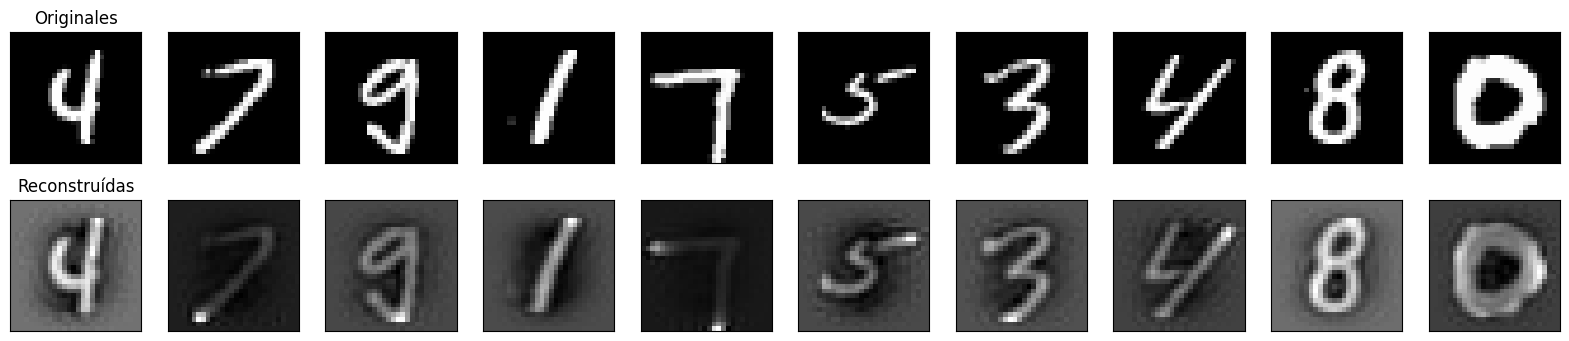

In [133]:
import matplotlib.pyplot as plt

#seleccionamos 10 imágenes al azar del conjunto original
n_images = 10
np.random.seed(42) #salía un error y esto me lo corrigió gemini :P
random_indices = np.random.choice(len(mnist), n_images, replace=False)

#excluimos la primera columna pues ese es el target
original_images = mnist.iloc[random_indices, 1:].values

reconstructed_images = X_reconstructed[random_indices, 1:]

original_images = original_images.reshape(-1, 28, 28)
reconstructed_images = reconstructed_images.reshape(-1, 28, 28)

#y las graficamos
plt.figure(figsize=(20, 4))
for i in range(n_images):

    #IMAGEN ORGINAL
    ax = plt.subplot(2, n_images, i + 1)
    plt.imshow(original_images[i], cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0:
        ax.set_title("Originales")

    #RECONSTRUIDO
    ax = plt.subplot(2, n_images, i + 1 + n_images)
    plt.imshow(reconstructed_images[i], cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    if i == 0:
        ax.set_title("Reconstruídas")

plt.show()

Vemos que hay una clara diferencia en la calidad de las imágenes. Arriba, en las originales es muy claro qué dígito se dibujó, y abajo está algo pixelado. Sin embargo, en la mayoría de las imágenes de abajo es fácil identificar qué dígito es. Pero se pueden cometer errores. El segundo y quinto se ven oscurecidos, lo que dificultaría para una máquina reconocer el dígito.

In [134]:
#Ahora calculamos el error de reconstrucción

from sklearn.metrics import mean_squared_error

MSE= mean_squared_error(Z_mnist, X_reconstructed)
sys.stdout.write('MSE: ' + str(MSE) + '\n')

MSE: 0.04247961885672352


25

No está nada mal. Es un valor bajo según el contexto en el que estamos, y como vimos en las imágenes, aún los números son reconocibles y estamos trabajando con un dataset más ligero

In [ ]:
#hacemos un arreglo que contendrá los MSE según el número de componentes que escojamos,

#desde 1 hasta 400

componentes=np.arange(1, 401)

errores=[]

for c in componentes:

  pca = PCA(n_components=c)

  Z_mnist.columns = Z_mnist.columns.astype(str)

  pca.fit(Z_mnist)

  X_pca_mnist = pca.transform(Z_mnist)

  X_reconstructed = pca.inverse_transform(X_pca_mnist)

  MSE= mean_squared_error(Z_mnist, X_reconstructed)

  errores.append(MSE)

#y graficamos

plt.plot(componentes, errores, color='pink')

plt.xlabel("Número de componentes")

plt.ylabel("Error de reconstrucción")

plt.grid()

plt.show()

#ESTA CELDA ES LA PESADA, CORRER POCAS VECES

Vemos que justamente alrededor de 300, el error deja de reducirse significativamente. Ya es menos de 0.1 en 175. Sin embargo, en 280, precisamente nuestro umbral de componentes, es el punto donde la reducción ya no es muy significativa y toma mucho más tiempo de cómputo hacerlo con más componentes (esta gráfica tomó 9 minutos D:)

De hecho, si comparamos las gráficas de varianza acumulada y de MSE vemos que son inversas

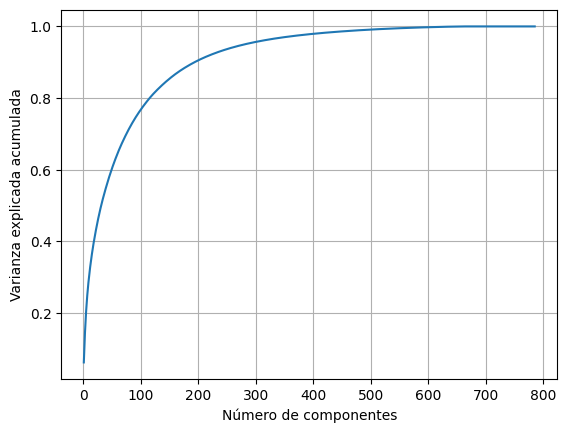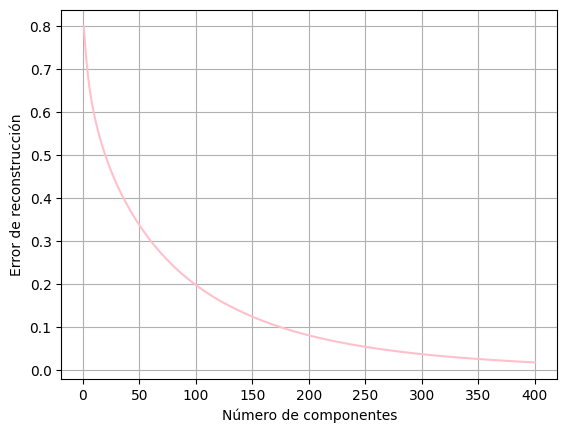

Ahora tomamos los primeros 1000 dígitos

In [136]:
y = mnist.iloc[:, 0].values
y_subset = y[:1000] #agarramos los primeros 1000 target
X = mnist.iloc[:, 1:].values
X_subset = X[:1000] #agarramos los primeros 1000 dígitos

In [163]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_subset)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [164]:
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

def graficar_digitos(X, y, min_distancia=0.001, mostrar_scatter=True, mostrar_texto=True, mostrar_imagenes=False, imagenes=None, figsize=(13, 13)):

    # Escalar las coordenadas a [0,1] para que todo quede en un rango uniforme
    X_normalizado = MinMaxScaler().fit_transform(X)

    # Lista de coordenadas ya ocupadas (para evitar superposición)
    vecinos = np.array([[10., 10.]])

    # Crear figura
    plt.figure(figsize=figsize)
    cmap = mpl.cm.get_cmap("jet")
    digitos = np.unique(y)

    # Dibujar scatter por clase
    if mostrar_scatter:
        for digito in digitos:
            plt.scatter(X_normalizado[y == digito, 0],
                        X_normalizado[y == digito, 1],
                        c=[cmap(digito / 9)],
                        alpha=0.6, label=str(digito))

    plt.axis("off")
    ax = plt.gca()

    # Dibujar textos o imágenes
    for indice, coord in enumerate(X_normalizado):
        distancia_min = np.linalg.norm(np.array(vecinos) - coord, axis=1).min()
        if distancia_min > min_distancia:
            vecinos = np.r_[vecinos, [coord]]

            if mostrar_imagenes and imagenes is not None:
                # Mostrar miniatura
                imagen = imagenes[indice].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(imagen, cmap="binary"), coord)
                ax.add_artist(imagebox)

            elif mostrar_texto:
                # Mostrar número
                plt.text(coord[0], coord[1], str(int(y[indice])),
                         color=cmap(y[indice] / 9),
                         fontdict={"weight": "bold", "size": 12})

    if mostrar_scatter:
        plt.legend(title="Digitos", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()


/tmp/ipython-input-2116534723.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = mpl.cm.get_cmap("jet")


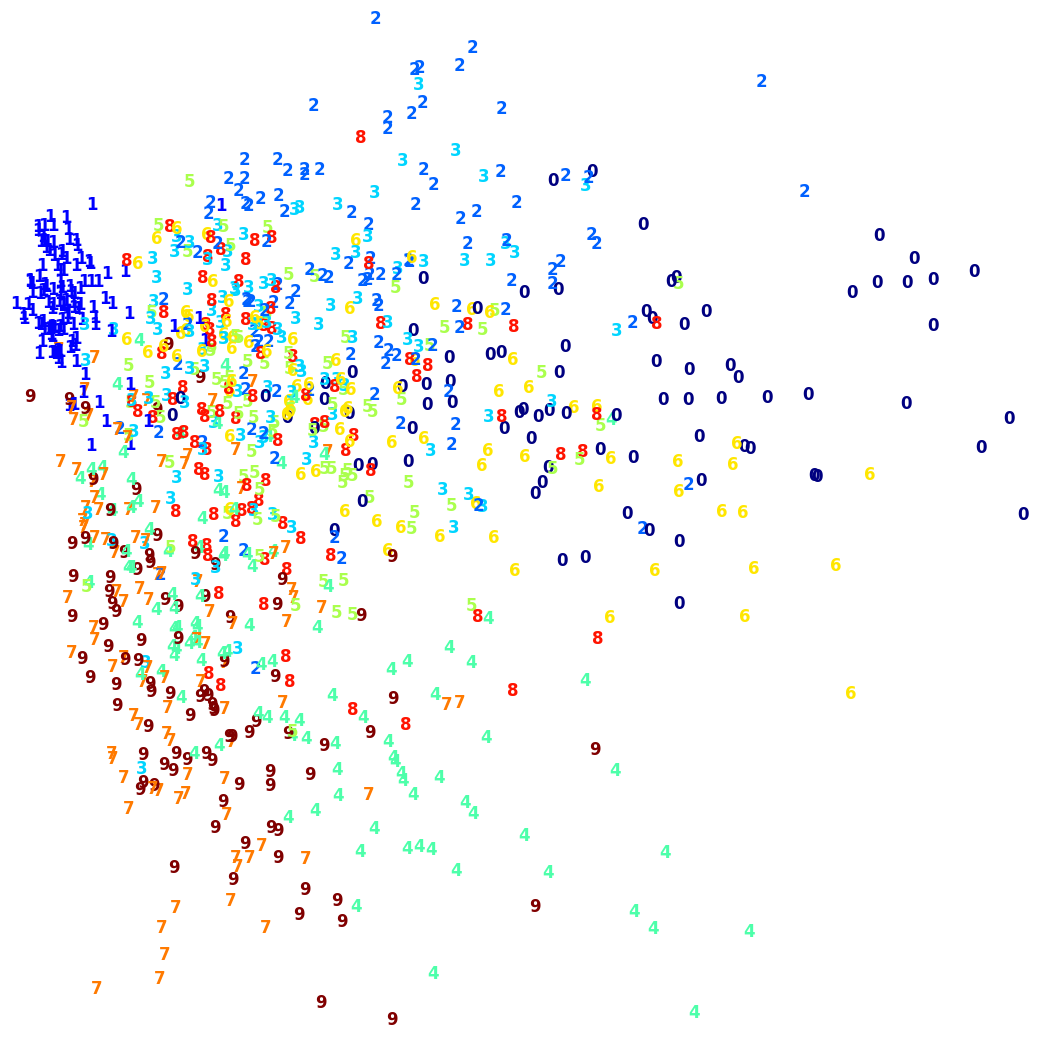

/tmp/ipython-input-2116534723.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = mpl.cm.get_cmap("jet")


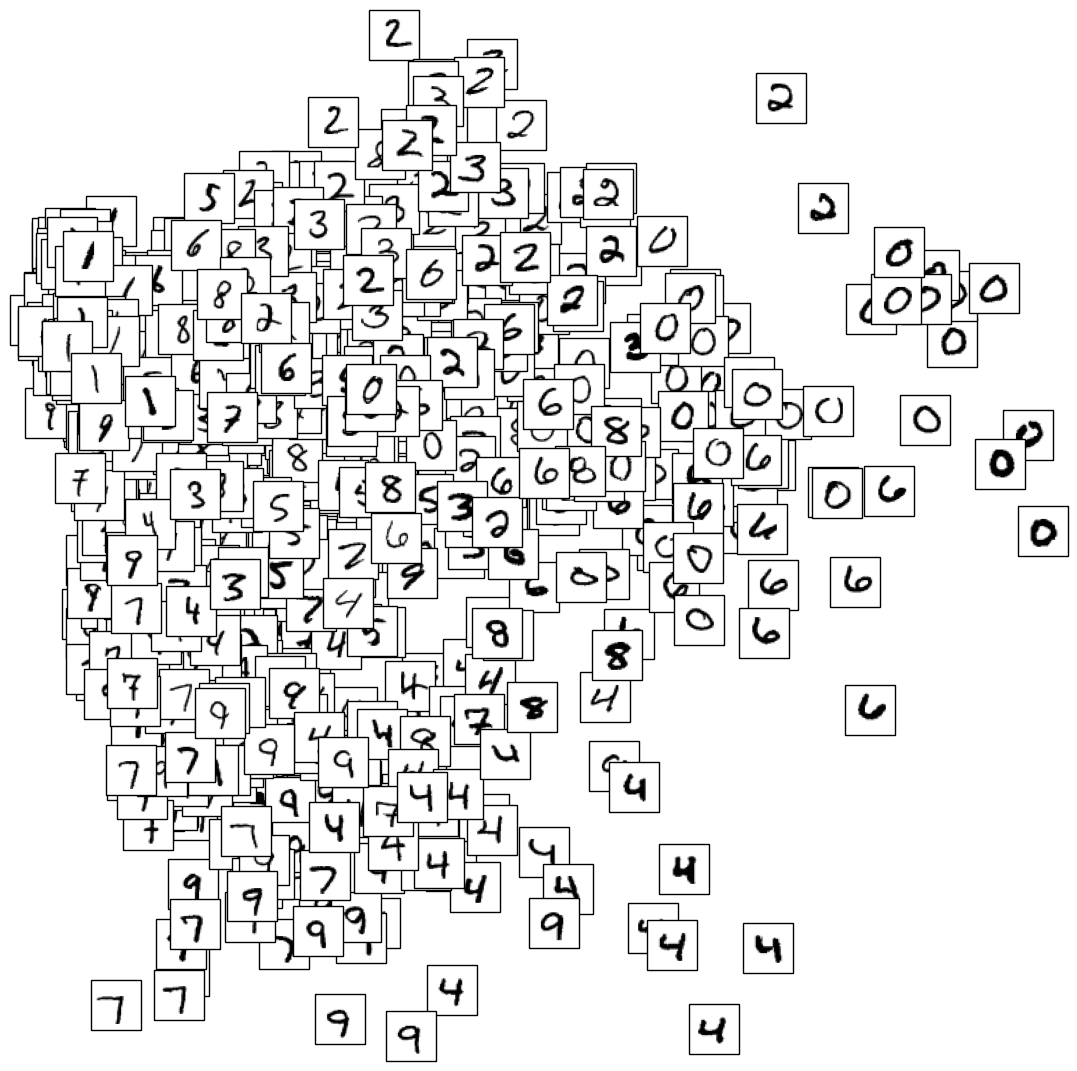

In [165]:
graficar_digitos(X_pca, y_subset, mostrar_scatter=False,
mostrar_texto=True, mostrar_imagenes=False)

graficar_digitos(X_pca, y_subset, mostrar_scatter=False,
mostrar_texto=False, mostrar_imagenes=True, imagenes=X)

/tmp/ipython-input-2116534723.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = mpl.cm.get_cmap("jet")


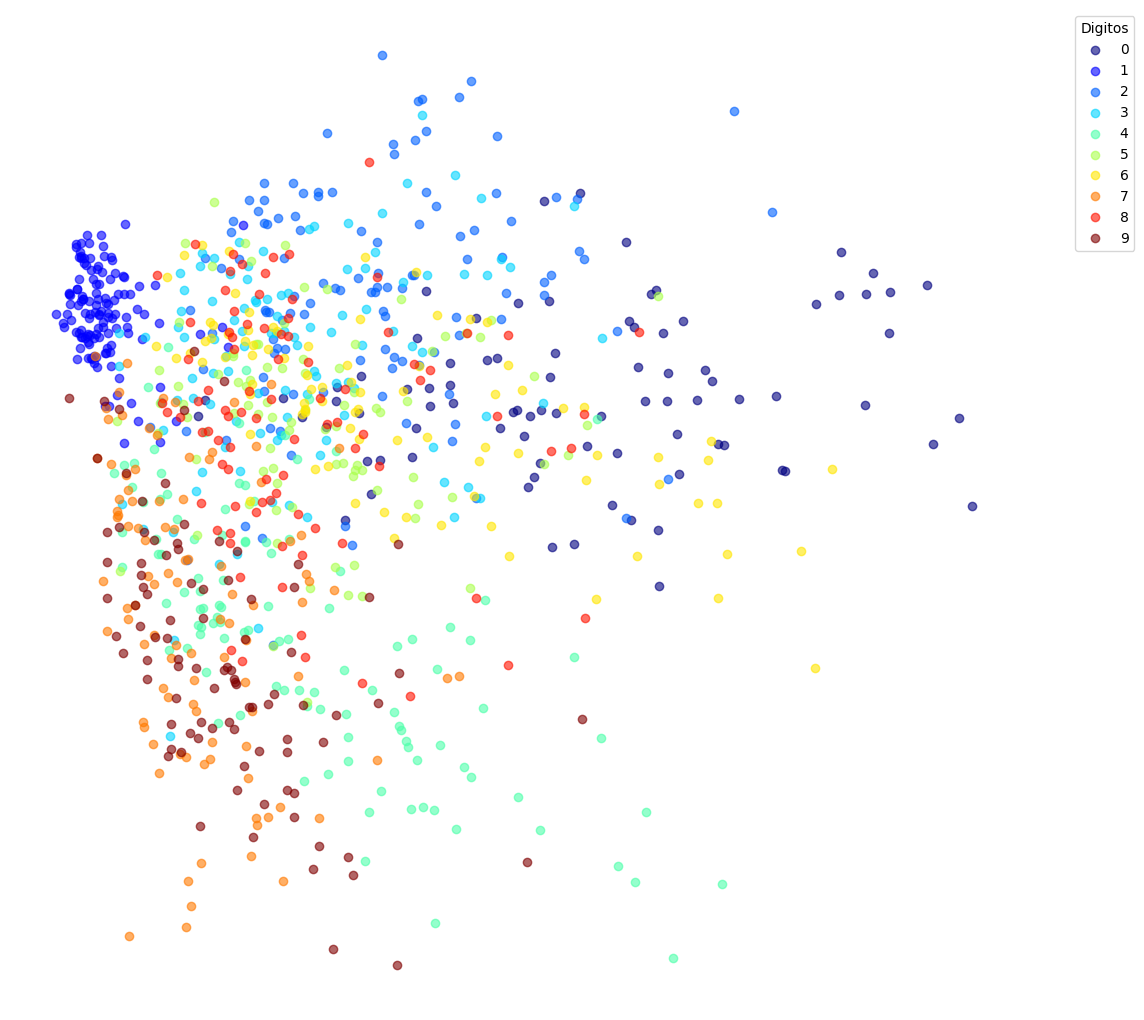

In [166]:
graficar_digitos(X_pca, y_subset, mostrar_scatter=True,
mostrar_texto=False, mostrar_imagenes=False)

In [172]:
#ahora lo hacemos con todos los datos del set
#volvemos a sacar PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(mnist.iloc[:, 1:])
pca = PCA(n_components=2)
X_pca_total = pca.fit_transform(X_scaled)

/tmp/ipython-input-2116534723.py:17: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = mpl.cm.get_cmap("jet")


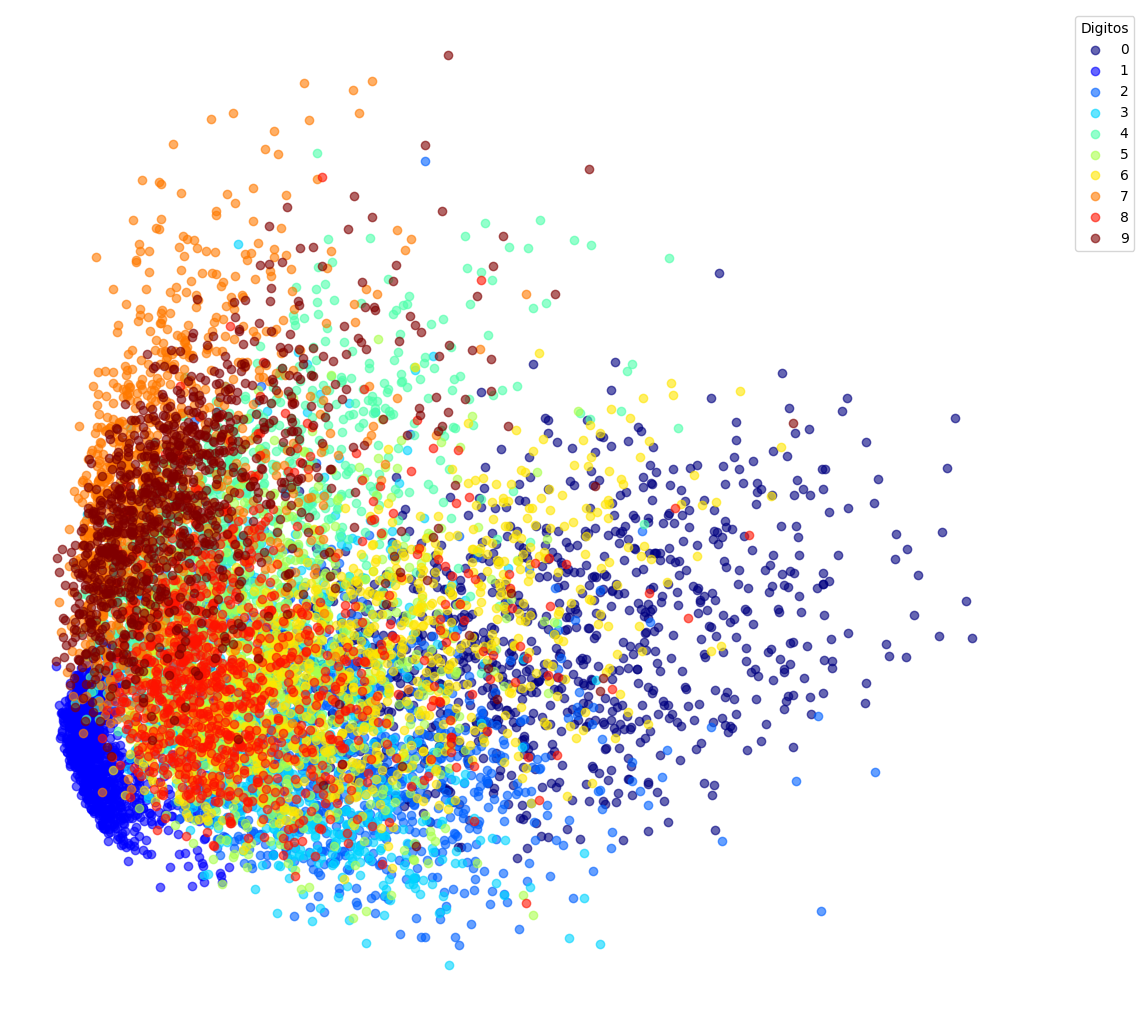

In [171]:
graficar_digitos(X_pca_total, mnist.iloc[:, 0], mostrar_scatter=True,
mostrar_texto=False, mostrar_imagenes=False)

Es verdad, se forman grupos distinguibles, por ejemplo con los unos. Están concentrados de una manera muy clara, los 9 y 8 son distinguibles por color. Pero al estar todos los dígitos encimados, establecer un umbral como lo hicimos con el dataset de cancer de mama es difícil y no nos daría buenos resultados para la predicción, como sí lo haría con el conjunto Iris.

No podemos visualizarlo, pero si pudieramos graficar un espacio de 281 dimensiones, veríamos la distribución de los dígitos de forma mucho más clara y sería mucho más fácil establecer un umbral "a ojo" para separar los dígitos.